In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'viridis'

import os
import h5py

from skimage import graph, data, io, segmentation, color, filters
from skimage.measure import regionprops
from skimage.util.montage import montage2d
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

In [63]:
def superpixel_seg(labels, pet_proj, thresh_value = 1.0):
    label_rgb = color.label2rgb(labels, pet_proj, kind='avg')
    threshold_proj = pet_proj > thresh_value
    all_proj = np.stack((label_rgb, threshold_proj))
    bright_segs = np.zeros_like(labels)

    for i in np.unique(labels):
        region_mask = (labels == i)
        region_pet = pet_proj[region_mask]
        if region_pet.max() > thresh_value:
            bright_segs[labels == i] = labels[labels == i]
    return bright_segs

def superpixel_score(labels, label_proj, thresh_value = 1.0):
    label_rgb = color.label2rgb(labels, pet_proj, kind='avg')
    otsu_proj = pet_proj > thresh_value
    all_proj = np.stack((label_rgb, otsu_proj))
    bright_segs = np.zeros_like(labels)

    for i in np.unique(labels):
        region_mask = (labels == i)
        region_pet = label_proj[region_mask]
        if label_proj.max() > otsu_threshold:
            bright_segs[labels == i] = labels[labels == i]
    return bright_segs

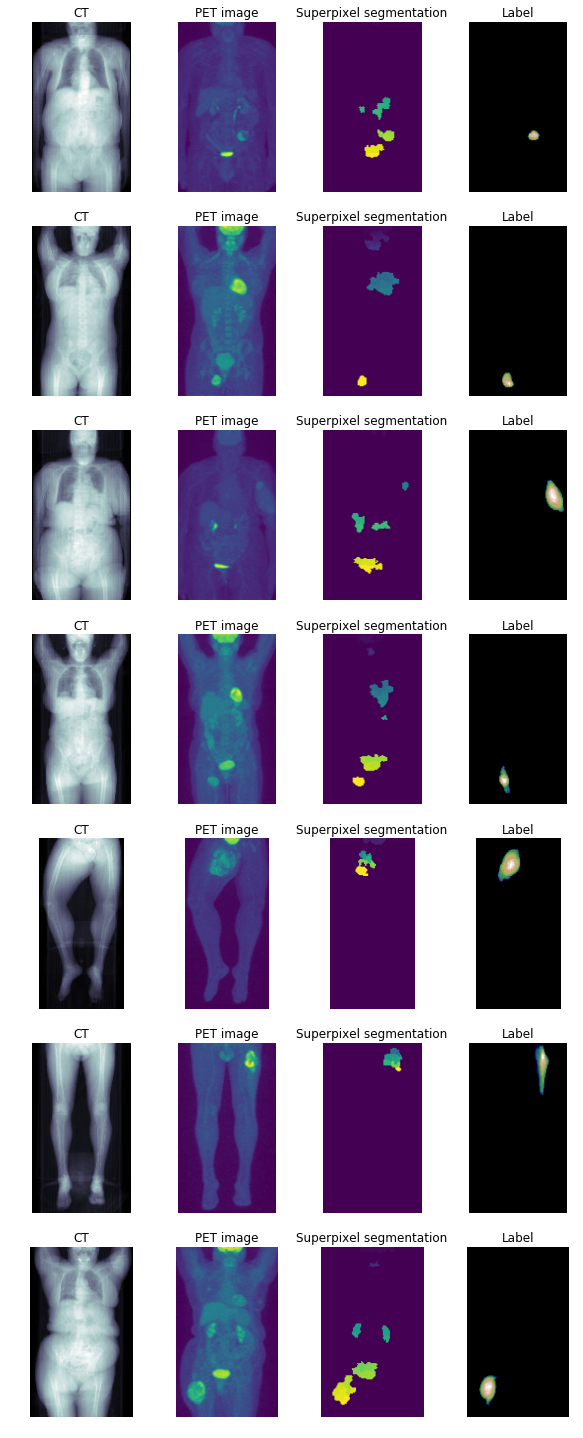

In [80]:
slic_n_segments = 500
slic_compactness = 0.01
with h5py.File(os.path.join('..', 'input', 'lab_petct_vox_5.00mm.h5'), 'r') as p_data:
    ct_images = p_data['ct_data'].items()
    pet_images = p_data['pet_data'].values()
    lab_images = p_data['label_data'].values()
    fig, sb_mat = plt.subplots(7, 4, figsize=(10, 25))
    (ax1s, ax2s, ax3s, ax4s) = sb_mat.T
    for c_ax1, c_ax2, c_ax3, c_ax4, (p_id, ct_img), pet_img, lab_img in zip(ax1s, ax2s, ax3s, ax4s, ct_images, pet_images, lab_images):
        
        ct_image = np.mean(ct_img, 1)[::-1]
        c_ax1.imshow(ct_image, cmap = 'bone')
        c_ax1.set_title('CT')
        c_ax1.axis('off')
        
        pet_proj = np.max(pet_img, 1)[::-1]
        pet_image = np.sqrt(np.max(pet_img,1).squeeze()[::-1,:])
        c_ax2.imshow(pet_image)
        c_ax2.set_title('PET image')
        c_ax2.axis('off')
        
        labels = slic(pet_proj, n_segments=500, compactness=1)
        b = superpixel_seg(labels + 1, pet_proj, thresh_value=4.6)
        c_ax3.imshow(b)
        c_ax3.set_title('Superpixel segmentation')
        c_ax3.axis('off')
        
        c_ax4.imshow(np.mean(lab_img, 1)[::-1], cmap='gist_earth')
        c_ax4.set_title('Label')
        c_ax4.axis('off')